In [4]:
using Pkg
Pkg.activate("envs/lecture3")
Pkg.instantiate()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %

In [15]:
using Plots
gr()

Plots.GRBackend()

# Lecture 3
## Contributing to Open Source


### Why?

1. It is fun!
2. You will learn a lot.
3. Review by others teaches you to write better code
4. It leads to better science

### Why not?

1. It takes time -- a lot of time
2. Requires a thick skin
3. Cross-cultural communication can be hard

### The structure of a contribution
https://opensource.guide/how-to-contribute/

1. Formulate a need: Why are you doing this, what do you want to achieve
2. Communicate: Open an issue, write on the mailing-list (Especially for large contribution)
3. Write-up a pull-request that is up to the standard (or better) than the project you contribute to
  1. Have docs
  2. Have tests
4. Be kind to open-source maintainers and have patience

### How to contribute to a Julia package

1. `]dev PackageName`
2. `cd ~/.julia/dev/PackageName`
3. create a branch `git checkout -b bugfix`
4. Change!
4. Test! `]test PackageName`
5. Commit `git commit`

1. Fork package on github
2. `git remote add me git@github.com/me/PackageName.jl`
3. `git push -u me bugfix`
4. Open PR! (explaining why and what you did)

Or:
```
hub fork
hub push -u me bugfix
hub pull-request
```

### How to contribute to Julia

#### Build Julia from source
1. `git clone https://github.com/JuliaLang/julia`
2. `cd julia && make -j`
3. Change!
4. `make testall` or `make -C test threads`
5. As above

## Julia in the scientific community
Take a look at https://pretalx.com/juliacon2019/talk/ for this year's JuliaCon.

If you do anything with differential equations I thouroughly recommend http://juliadiffeq.org/

### Celeste.jl
Cataloging the Visible Universe through Bayesian Inference (at Petascale)
https://www.youtube.com/watch?v=uecdcADM3hY

- https://arxiv.org/pdf/1801.10277.pdf
- https://arxiv.org/pdf/1803.00113.pdf

- Loaded an aggregate of ~178 terabytes of image data and produced parameter estimates for 188 million stars and galaxies in 14.6 minutes
 - Written entirely in Julia and achieved a peak performance of 1.54 petaflops using 1.3 million threads on 9,300 Knights Landing (KNL) nodes of the Cori supercomputer at NERSC
- Demonstrated conclusively that massive and complex datasets can be analyzed with Bayesian inference by applying variational inference (VI)
- Provided not only point estimates for light sources but, for the first time, a principled measure of the quality of inference for each light source (posterior uncertainty for source type, brightness, and colors)

### CLIMA
- https://clima.caltech.edu/
- https://github.com/climate-machine/CLIMA


## Useful tools for science

- [Unitful.jl](https://github.com/PainterQubits/Unitful.jl)
- [Measurements.jl](https://github.com/JuliaPhysics/Measurements.jl)

In [27]:
using Measurements, Unitful

hypot((3 ± 1)*u"m", (4 ± 2)*u"m") # Pythagorean theorem

5.0 ± 1.7 m

In [29]:
(50 ± 1)*u"Ω" * (13 ± 2.4)*1e-2*u"A" |> u"V" # Ohm's Law

6.5 ± 1.2 V

In [21]:
2pi*sqrt((5.4 ± 0.3)*u"m" / ((9.81 ± 0.01)*u"m/s^2")) # Pendulum's period

4.66 ± 0.13 s

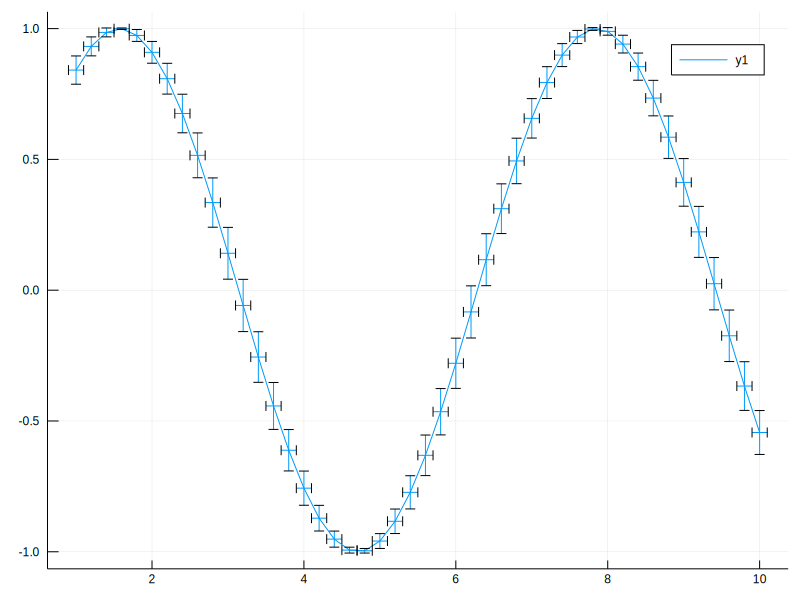

In [30]:
plot(sin, [x ± 0.1 for x in 1:0.2:10], size = (800, 600))

## Some of my favourite tools
- [StaticArrays.jl](https://github.com/JuliaArrays/StaticArrays.jl)
- [StructArrays.jl](https://github.com/piever/StructArrays.jl)
- [Images.jl](https://github.com/JuliaImages/Images.jl) and [Colors.jl](https://github.com/JuliaGraphics/Colors.jl)

## Probabilisitic Programming

- [Turing.jl](https://turing.ml/) 
- [Gen.jl](https://probcomp.github.io/Gen/)
- [Stheno.jl](https://github.com/willtebbutt/Stheno.jl)


## A quick example using Stheno
*Gausian processes*

In [ ]:
using Stheno, Random, Statistics
using Stheno: @model

In [7]:
@model function model()
    f₁ = GP(randn(), eq())
    f₂ = GP(eq())
    f₃ = f₁ + f₂
    return f₁, f₂, f₃
end

model (generic function with 1 method)

In [ ]:
# Randomly sample `N₁` locations at which to measure `f` using `y1`, and `N2` locations
# at which to measure `f` using `y2`.
rng, N₁, N₃ = MersenneTwister(123546), 10, 11;
X₁, X₃ = rand(rng, N₁) * 10, rand(rng, N₃) * 10;
f₁, f₂, f₃ = model();

In [ ]:
# Generate some toy observations of `f₁` and `f₃`.
ŷ₁, ŷ₃ = rand(rng, [f₁(X₁), f₃(X₃)]);

# Compute the posterior processes.
(f₁′, f₂′, f₃′) = (f₁, f₂, f₃) | (f₁(X₁)←ŷ₁, f₃(X₃)←ŷ₃);

In [10]:
# Define some plotting stuff.
Np, S = 500, 25;
Xp = range(-2.5, stop=12.5, length=Np);

# Sample jointly from the posterior over each process.
f₁′Xp, f₂′Xp, f₃′Xp = rand(rng, [f₁′(Xp, 1e-9), f₂′(Xp, 1e-9), f₃′(Xp, 1e-9)], S);

# Compute posterior marginal distributions.
ms1 = marginals(f₁′(Xp));
ms2 = marginals(f₂′(Xp));
ms3 = marginals(f₃′(Xp));

# Pull out the posterior marginal means and standard deviations.
μf₁′, σf₁′ = mean.(ms1), std.(ms1);
μf₂′, σf₂′ = mean.(ms2), std.(ms2);
μf₃′, σf₃′ = mean.(ms3), std.(ms3);

In [13]:
posterior_plot = plot();

# Plot posterior marginal variances
plot!(posterior_plot, Xp, [μf₁′ μf₁′];
    linewidth=0.0,
    fillrange=[μf₁′ .- 3 .* σf₁′, μf₁′ .+ 3 * σf₁′],
    fillalpha=0.3,
    fillcolor=:red,
    label="");
plot!(posterior_plot, Xp, [μf₂′ μf₂′];
    linewidth=0.0,
    fillrange=[μf₂′ .- 3 .* σf₂′, μf₂′ .+ 3 * σf₂′],
    fillalpha=0.3,
    fillcolor=:green,
    label="");
plot!(posterior_plot, Xp, [μf₃′ μf₃′];
    linewidth=0.0,
    fillrange=[μf₃′ .- 3 .* σf₃′, μf₃′ .+ 3 * σf₃′],
    fillalpha=0.3,
    fillcolor=:blue,
    label="");

# Plot joint posterior samples
plot!(posterior_plot, Xp, f₁′Xp,
    linecolor=:red,
    linealpha=0.2,
    label="");
plot!(posterior_plot, Xp, f₂′Xp,
    linecolor=:green,
    linealpha=0.2,
    label="");
plot!(posterior_plot, Xp, f₃′Xp,
    linecolor=:blue,
    linealpha=0.2,
    label="");

# Plot posterior means
plot!(posterior_plot, Xp, μf₁′;
    linecolor=:red,
    linewidth=2.0,
    label="f1");
plot!(posterior_plot, Xp, μf₂′;
    linecolor=:green,
    linewidth=2.0,
    label="f2");
plot!(posterior_plot, Xp, μf₃′;
    linecolor=:blue,
    linewidth=2.0,
    label="f3");

# Plot observations
scatter!(posterior_plot, X₁, ŷ₁;
    markercolor=:red,
    markershape=:circle,
    markerstrokewidth=0.0,
    markersize=4,
    markeralpha=0.7,
    label="");
scatter!(posterior_plot, X₃, ŷ₃;
    markercolor=:blue,
    markershape=:circle,
    markerstrokewidth=0.0,
    markersize=4,
    markeralpha=0.7,
    label="");

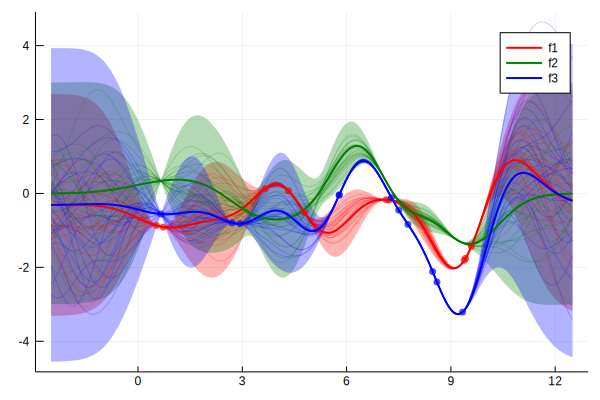

In [14]:
posterior_plot

## Differentiable Programming

- ForwardDiff.jl
- ReverseDiff.jl
- Zygote.jl 
- Nabla.jl
- http://blog.rogerluo.me/2018/10/23/write-an-ad-in-one-day/

### AD in 10 minutes
Lecture material originally from Alan Edelman
